In [1]:
import warnings
warnings.filterwarnings('ignore')
from pc_model import plot_query, score_query, score_model_similarity, compare_para_positions_across_models, Marr2Algorithms
from csv_analysis import make_regression_plots
import numpy as np
import seaborn as sb
import sys
from scipy.stats import wilcoxon, ttest_1samp, mannwhitneyu, pearsonr, entropy, beta, norm
from scipy.special import kl_div
sb.set()
from matplotlib import pyplot as pl
np.random.seed()
%matplotlib inline
sb.set()
current_palette = sb.color_palette()



In [2]:
run pc_model

Building Independent Reg Model
Building Independent Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Building Multiple Reg Model
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Executing Models
Execu

[(225,), (225,), (225,), (225,), (225,), (225,), (225,)]
[(225,), (225,), (225,), (225,), (225,), (225,), (225,)]
[(225,), (225,), (225,), (225,), (225,), (225,), (225,)]
[(), (), (), (), (), (), ()]


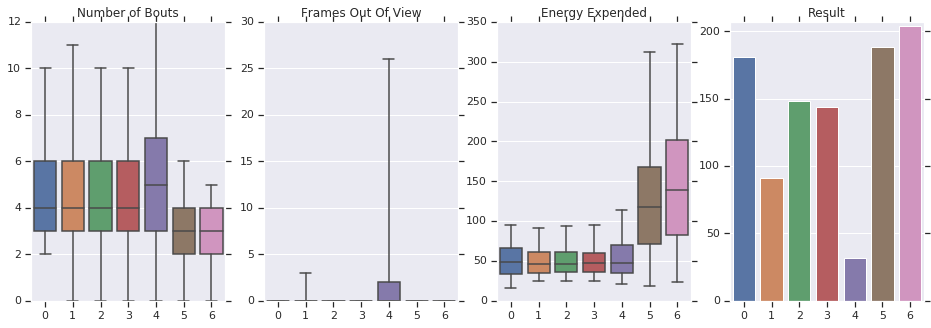

In [3]:
#fig = plot_query(ms, p_inits, strike_params, 'box')
fig = plot_query(ms, p_inits, strike_params, 'box')
fig.savefig('model_results.pdf')

### THESE FUNCTIONS DESCRIBE PARA THAT FISH MODELS FAIL TO CATCH

[array([  1.65816036e-02,   2.98566241e-01,   8.25824170e+01]), array([  0.12765728,   0.19959274,  16.9931383 ])]


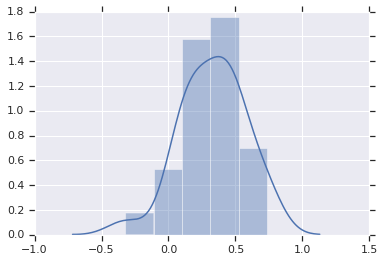

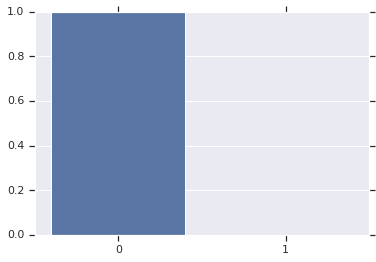

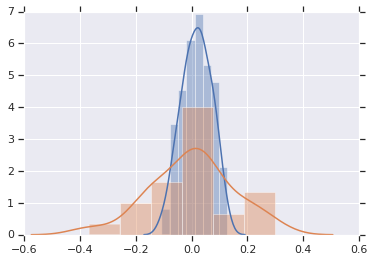

In [7]:
# means and standard devs of strike location. dist is 2 standard devs or below
print strike_params[0:2]
model_number = 0
actions = [2]
ci = .32

fish_stats_at_term = [sm.fish_pitch[-1] for sm, d in zip(
    simlist_by_model[model_number], ms[model_number]) if d['Result'] in actions]

pl.figure()
sb.distplot(fish_stats_at_term)

modified_strike_params = np.array([strike(d['Para Position at Term'], 
                                    strike_params[0], 
                                    strike_params[1], ci)[0] for d in ms[model_number] if d['Result'] in actions])
pvarb = 'Para Az'
#pvarb_at_term_miss = [d['Para Position at Term'][pvarb] for d in ms[model_number] if d['Result'] in actions]
#pvarb_at_term_hit = [d['Para Position at Term'][pvarb] for d in ms[model_number] if d['Result'] == 1]
#pvarb_at_term_hit =[d['Para Position at Term'] for d in ms[model_number] if d['Result'] == 1]
pvarb_at_term_miss = [d['Para Position at Term'][pvarb] for d in ms[model_number] if d['Result'] in actions]
pvarb_at_term_hit = [d['Para Position at Term'][pvarb] for d in ms[model_number] if d['Result'] == 1]



pl.figure()
sb.barplot(data=[modified_strike_params==0, modified_strike_params==1])
pl.figure()
sb.distplot([pv for pv in pvarb_at_term_hit if np.isfinite(pv)])
sb.distplot([pv for pv in pvarb_at_term_miss if np.isfinite(pv)])




#[d['Para Position at Term'] for d in ms[0] if d['Result'] == 2]
#[static_strike(d['Para Position at Term'], strike_params[0], strike_params[1]) for d in ms[0] if d['Result'] == 2]

# QUERY ON DISTANCE BEING LOW ALT AZ REQUIREMENTS. 


### DESCRIBE ONGOING PARA POSITIONS AS MODELS PROCEED

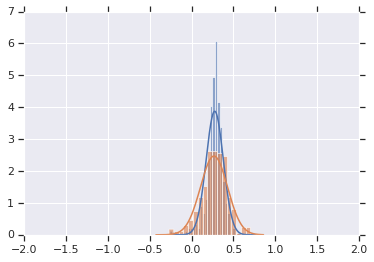

Mean, STD Model 1
0.276371059614
0.102956904006
Mean, STD Model 2
0.267366360476
0.161535958679


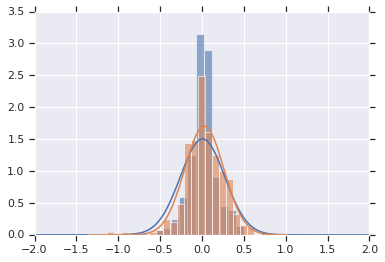

Mean, STD Model 1
0.00684103304626
0.265213468812
Mean, STD Model 2
0.0275722992166
0.23402286743


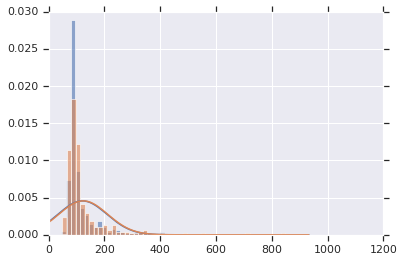

Mean, STD Model 1
121.366668077
87.5372892329
Mean, STD Model 2
124.287035771
87.4372695995


In [41]:
# def compare_para_positions_across_models(simlist_by_hunt, mod1, mod2,
                                         # pre_or_post, use_abs, varb, *para_coords):
    
# para_coords entry allows you to directly add coords from marralgs runs. 
    
# mod1 and mod2 are compared by index in modlist. current modlist is:

# modlist2 =    [{"Model Type": "Real Coords", "Real or Sim": "Real"},
#                {"Model Type": "Multiple Regression Position", "Real or Sim": "Real"},
#                {"Model Type": "Multiple Regression Velocity", "Real or Sim": "Real"}, 
#                {"Model Type": "Ideal", "Real or Sim": "Real", "Spherical Bouts": "All"},
#                {"Model Type": "Ideal", "Real or Sim": "Real", "Spherical Bouts": "All", "Extrapolate Para": 10},
#                {"Model Type": "Ideal", "Real or Sim": "Real", "Spherical Bouts": "Hunt"},
#                {"Model Type": "Ideal", "Real or Sim": "Real", "Spherical Bouts": "Hunt", "Extrapolate Para": 10},
#                {"Model Type": "Random", "Real or Sim": "Real", "Spherical Bouts": "All"},
#                {"Model Type": "Random", "Real or Sim": "Real", "Spherical Bouts": "Hunt"}

model1 = 9
model2 = 8

pv2, pv1, ax = compare_para_positions_across_models(simlist_by_hunt, model1, model2, 1, False, 'Para Alt')
pv2, pv1, ax = compare_para_positions_across_models(simlist_by_hunt, model1, model2, 1, False, 'Para Az')
pv2, pv1, ax = compare_para_positions_across_models(simlist_by_hunt, model1, model2, 1, False, 'Para Dist')
#paz1, paz2, ax = compare_para_positions_across_models(simlist_by_hunt, 1, 2, 1, False, 'Para Az')
#palt1, palt2, ax = compare_para_positions_across_models(simlist_by_hunt, 1, 2, 1, False, 'Para Alt')


### COMPARE MODELS BETWEEN EACH OTHER ACCORDING TO FISH STATS

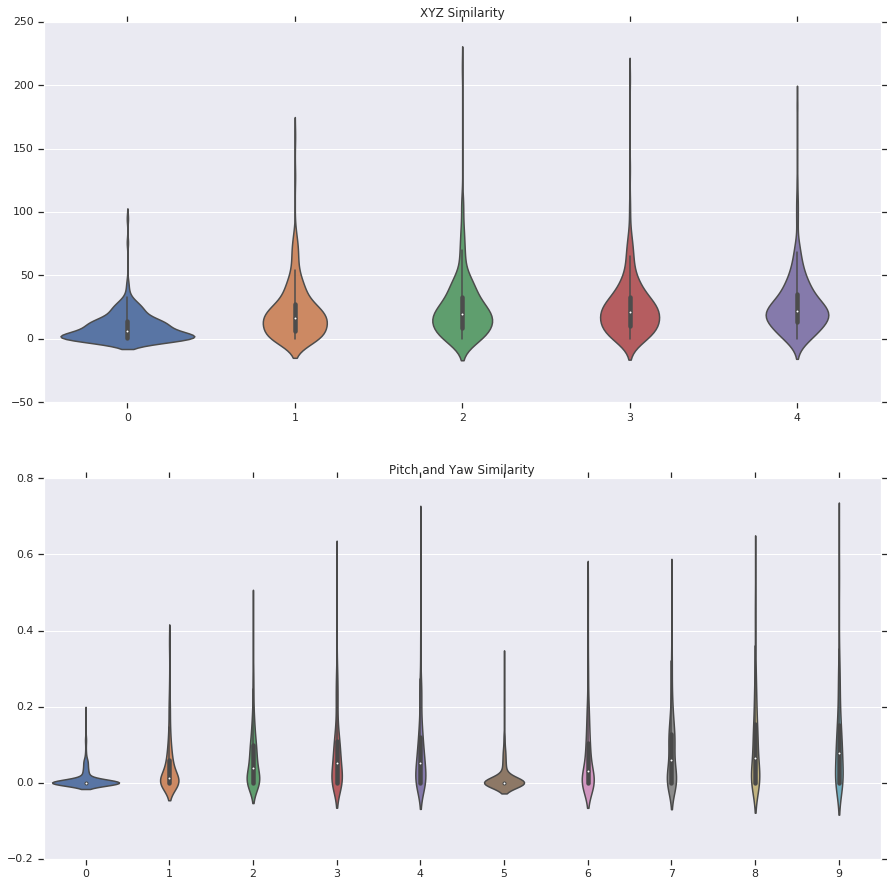

XYZ Quartiles
[[0.3014201330123285, 5.973316173788714, 13.968338395107107], [6.556521301053815, 16.08625053168715, 27.21837618179032], [8.544005068748962, 19.56071626251196, 33.249794599516584], [10.39275655217995, 21.225567982887267, 32.84519295611936], [13.12947600307687, 21.95135686432453, 35.519906974067815]]
Pitch Quartiles
[[0.0, 0.0, 0.0], [0.0, 0.01108215463548492, 0.05989488758106756], [0.0, 0.03988734258539564, 0.09901480876072524], [0.0, 0.052936160412471754, 0.1085177046322941], [0.0, 0.05125626100023035, 0.12011998330303607]]
Yaw Quartiles
[[0.0, 0.0, 0.0], [0.0, 0.031774311186977794, 0.10441629397496693], [0.0, 0.06004455444984128, 0.12796886527133916], [0.0, 0.06492619019818087, 0.1534985037302249], [0.0, 0.0772601814822668, 0.15199437993656267]]


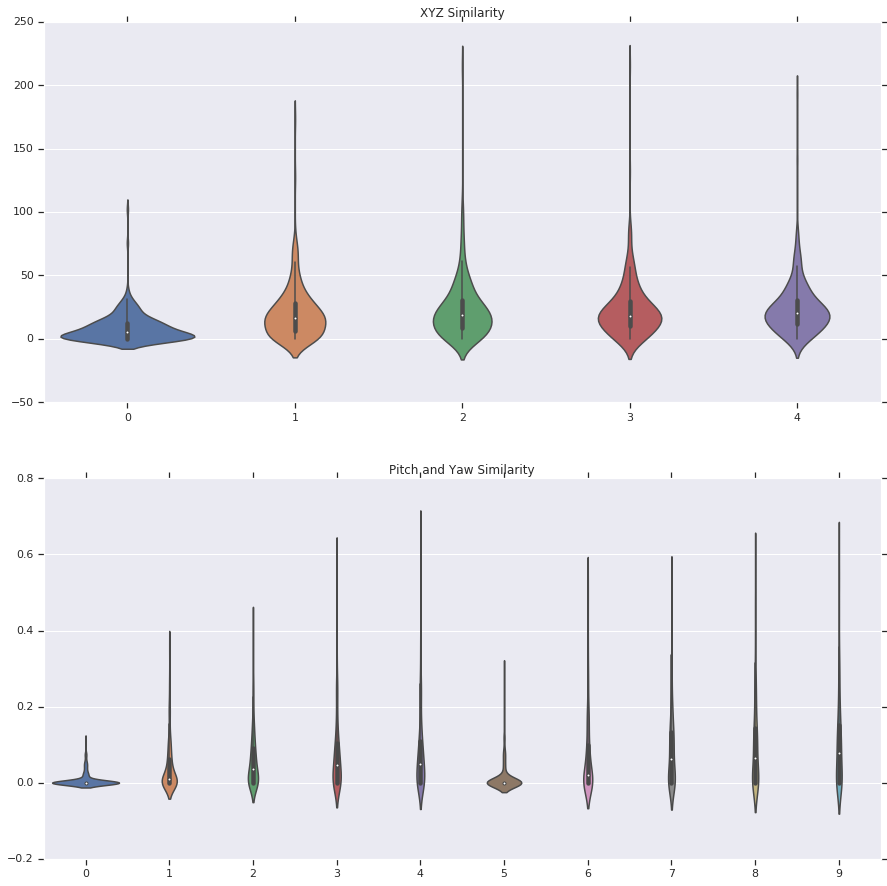

XYZ Quartiles
[[0.19957393954873623, 5.195508382611919, 12.715842240999729], [5.817935113511619, 16.629561877400825, 28.15199946209856], [8.521903801139175, 18.593442492265073, 30.434410192404908], [9.971703831088277, 18.288700663622734, 30.034499450710438], [11.58916974653732, 20.2411072321905, 30.524370885182243]]
Pitch Quartiles
[[0.0, 0.0, 0.0], [0.0, 0.008856810058434727, 0.061998561407825836], [0.0, 0.037000165118759615, 0.09253745366818814], [0.0, 0.04678533198963558, 0.10324920040266314], [0.0, 0.04927426024989179, 0.10963759857531853]]
Yaw Quartiles
[[0.0, 0.0, 0.0], [0.0, 0.02064312691662155, 0.09995841792855992], [0.0, 0.061770774882567936, 0.13443429890653474], [0.0, 0.06427640623272221, 0.14390397370850233], [0.0, 0.0785535424156647, 0.15275246200564235]]


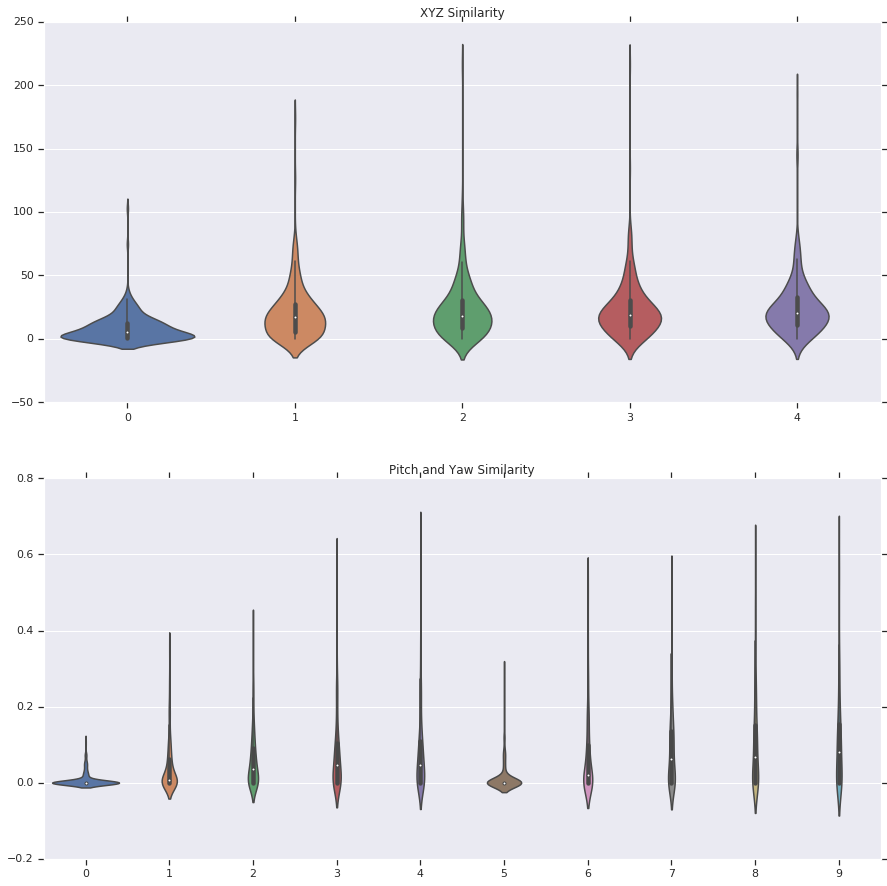

XYZ Quartiles
[[0.2910647963385823, 5.308363459842441, 12.750286062988735], [5.065973776859497, 16.862306972815304, 27.861530596833806], [8.374578773576317, 18.388629561794733, 30.614732968150093], [10.030351583958893, 18.85205234193666, 30.61227811172123], [11.262917274288432, 20.384388166515883, 32.899183277371996]]
Pitch Quartiles
[[0.0, 0.0, 0.0], [0.0, 0.007933100997189088, 0.06203420482388826], [0.0, 0.037087463169964446, 0.09171976671260988], [0.0, 0.04635995915780659, 0.10550692608207425], [0.0, 0.047675173793206745, 0.10996583624708867]]
Yaw Quartiles
[[0.0, 0.0, 0.0], [0.0, 0.020010400367207765, 0.09901009056722807], [0.0, 0.06251344103026546, 0.13551012006316468], [0.0, 0.06830963482303076, 0.15139532550884743], [0.0, 0.08012230847197266, 0.1549179268388966]]


In [7]:
#def score_model_similarity(mod1_index, mod2_index,
#                           simlist_by_huntid, num_partitions):

# RETURNS : [fig, xyz_sim, pitch_scores, yaw_scores,
#           [prebout_para1, postbout_para1], [prebout_para2, postbout_para2]]

#sb.set_style('white')
#score_trajectory_similarity(True, simlist_by_hunt[100][0], simlist_by_hunt[100][2])
#sms02 = score_model_similarity(0, 2, simlist_by_hunt, 3)
sms01 = score_model_similarity(0, 1, simlist_by_hunt, 5)
sms02 = score_model_similarity(0, 2, simlist_by_hunt, 5)
sms03 = score_model_similarity(0, 3, simlist_by_hunt, 5)
#sms12 = score_model_similarity(1, 2, simlist_by_hunt, 3)

([0.57999999999999996,
  0.71999999999999997,
  0.96999999999999997,
  0.83999999999999997],
 [0.012, 0.085000000000000006, 0.078, -8.9440000000000008])

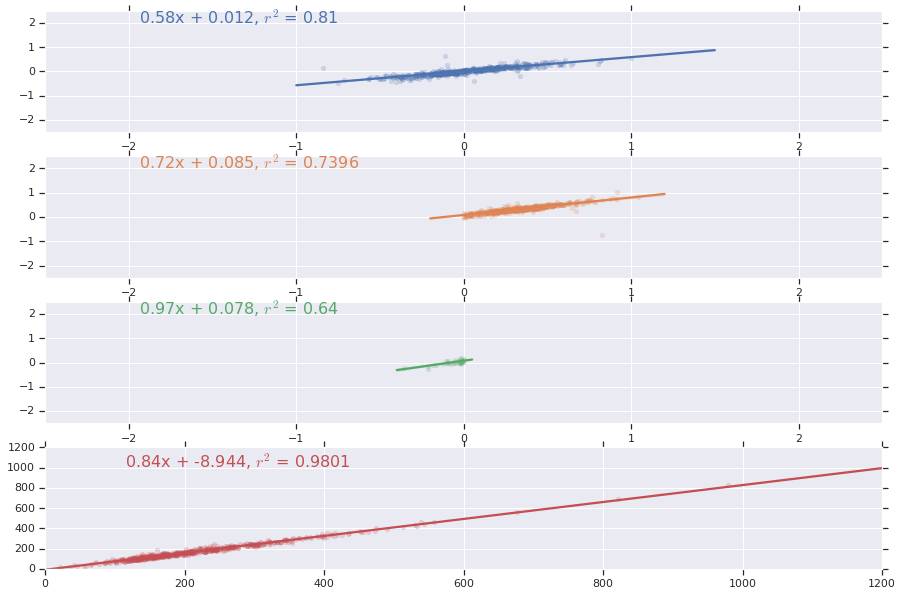

In [8]:
validate_model_transformations(sms03[5][0], sms03[5][1])

In [4]:
marralgs.static_params

{'alt_b_neg': 0.128,
 'alt_b_pos': 0.22900000000000001,
 'alt_m_neg': 0.82999999999999996,
 'alt_m_pos': 0.32000000000000001,
 'az_b': 0.014999999999999999,
 'az_m': 0.40999999999999998,
 'dist_b': -12.736000000000001,
 'dist_m': 0.89000000000000001}

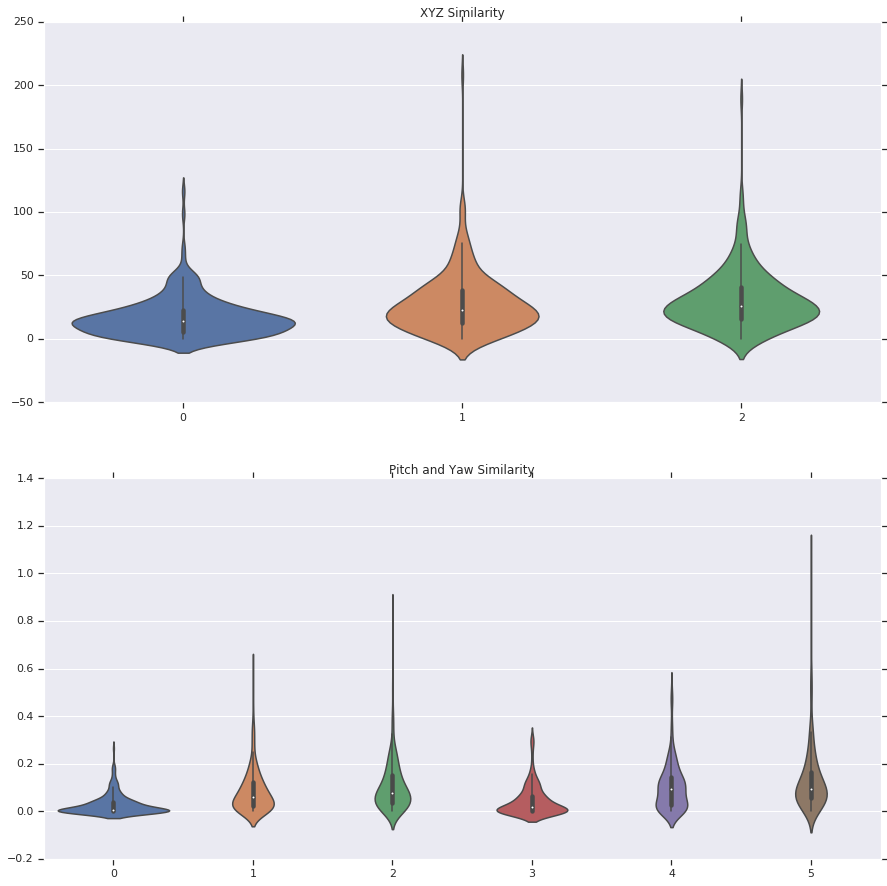

XYZ Quartiles
[[5.355113430601199, 14.045119522956842, 22.95126016396663], [12.550928694381923, 22.663022200618407, 38.27672558475261], [15.90896632498307, 25.79870727750277, 40.83153909326363]]
Pitch Quartiles
[[0.0, 0.007296411356851583, 0.040266143871222924], [0.023240859532585676, 0.058202727778176054, 0.1215898053151479], [0.03340676818878726, 0.07772265911310636, 0.15165574957971567]]
Yaw Quartiles
[[0.0, 0.019075475274547515, 0.06548729190385735], [0.02553764435134598, 0.09196349260532842, 0.14499818204047543], [0.05589564657777558, 0.0932192078087714, 0.16688700816399793]]


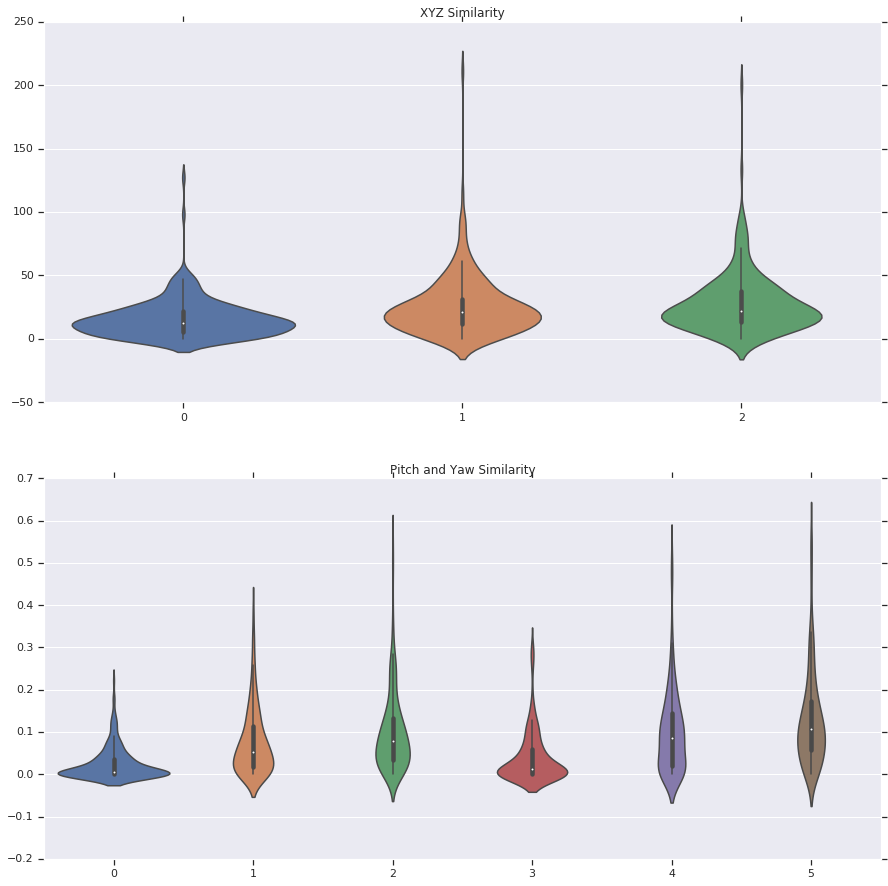

XYZ Quartiles
[[5.337508997381954, 12.88655397157044, 22.049814685209917], [11.678712363887072, 21.235091669505916, 31.80908613482988], [13.61601902568728, 22.17596574592822, 37.4216670466736]]
Pitch Quartiles
[[0.0, 0.005690698401999261, 0.03687409864547836], [0.016042412540861965, 0.053299791040614955, 0.11385162074608571], [0.03334533683957515, 0.07795598147280708, 0.13390206529962312]]
Yaw Quartiles
[[0.0, 0.012506407394263721, 0.05961121958335264], [0.020701295171807372, 0.08629667365809184, 0.14544075718058214], [0.05649846880874381, 0.10686442482374847, 0.1740953719733702]]


WilcoxonResult(statistic=2910.0, pvalue=0.00078163636673032476)

In [22]:
scores01 = score_model_similarity(0, 1, simlist_by_hunt, 3)
scores02 = score_model_similarity(0, 2, simlist_by_hunt, 3)
#scores04 = score_model_similarity(0, 4, simlist_by_hunt)
#scores23 = score_model_similarity(2, 3, simlist_by_hunt)
wilcoxon(scores01[3][0], scores02[3][0])
# KEY RESULT. Significantly different towards velocity being smaller 


In [17]:
multiple_regression_model_euler[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Bout Alt   No. Observations:                 2173
Model:                            GLM   Df Residuals:                     2166
Model Family:                Gaussian   Df Model:                            6
Link Function:               identity   Scale:                  0.163277218126
Method:                          IRLS   Log-Likelihood:                -1110.8
Date:                Mon, 13 May 2019   Deviance:                       353.66
Time:                        19:17:02   Pearson chi2:                     354.
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.2139      0.021    -10.094      0.000        -0.255    -0.172
Para Az        0.0571      0.020      2.858      0.004         0.018     0.096
Para Alt       1.1635      0.035     33.361      0.000         1.095     1.232
Para Dist  -8.307e-05   7.44e-05     -1.116      0.264        -0.000  6.28e-05
Para dAz      -0.1781      0.066     -2.704      0.007        -0.307    -0.049
Para dAlt      1.6170      0.085     19.119      0.000         1.451     1.783
Para dDist    -0.0005      0.001     -0.640      0.522        -0.002     0.001
==============================================================================
"""

In [15]:
multiple_regression_model_position[3].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       Bout Delta Pitch   No. Observations:                 2173
Model:                            GLM   Df Residuals:                     2169
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                 0.0118902959835
Method:                          IRLS   Log-Likelihood:                 1734.1
Date:                Mon, 13 May 2019   Deviance:                       25.790
Time:                        19:09:10   Pearson chi2:                     25.8
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0560      0.005    -10.514      0.000        -0.066    -0.046
Para Az        0.0054      0.005      1.019      0.308        -0.005     0.016
Para Alt       0.2793      0.009     29.791      0.000         0.261     0.298
Para Dist   7.952e-05   1.94e-05      4.093      0.000      4.14e-05     0.000
==============================================================================
"""

### Calculate KL Divergence Between Para Positions During Models

In [ ]:
def calc_kl_divergence(p1, p2, numbins, range):
    colors = sb.color_palette()
    hist1, bins = np.histogram(p1, bins=numbins, range=range)
    pdf1 = hist1 / np.sum(hist1).astype(np.float)
    pdf1 = [p if p != 0 else 1e-10 for p in pdf1]
    hist2, bins = np.histogram(p2, bins=numbins, range=range)
    pdf2 = hist2 / np.sum(hist2).astype(np.float)
    pdf2 = [p if p != 0 else 1e-10 for p in pdf2]
    width = bins[1] - bins[0]
    center = (bins[:-1] + bins[1:]) / 2
    pl.bar(center, hist1, align='center', width=width, color=colors[0])
    pl.bar(center, hist2, align='center', width=width, color=colors[1])
    pl.show()
    return pdf1, pdf2
 # This is a really nice figure. Shows bimodal nature of the az in the position model, where
# the std comes about because its actually not getting the peak. 

pdf0, pdf1 = calc_kl_divergence(pv0, pv1, 20, (-.5,.5))
pdf0, pdf2 = calc_kl_divergence(pv0, pv2, 20, (-.5,.5))
print entropy(pdf0, pdf1)
print entropy(pdf0, pdf2)
pl.plot(np.cumsum(pdf0))
pl.plot(np.cumsum(pdf1))
pl.plot(np.cumsum(pdf2))
pl.show()  

print np.percentile(pv1, [25, 50, 75])
print np.percentile(pv2, [25, 50, 75])
print np.mean(pv1)
print np.std(pv1)
print np.mean(pv2)
print np.std(pv2)